In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loguru import logger

import seaborn as sns

import pickle
import requests
import json
import re
from pathlib import Path

from skylark import skylark_root

data_dir = skylark_root / "data"
figure_dir = data_dir / "figures" / "pareto_speedups_updated"
figure_dir.mkdir(exist_ok=True, parents=True)

plt.style.use("seaborn-bright")
plt.set_cmap("plasma")

<Figure size 432x288 with 0 Axes>

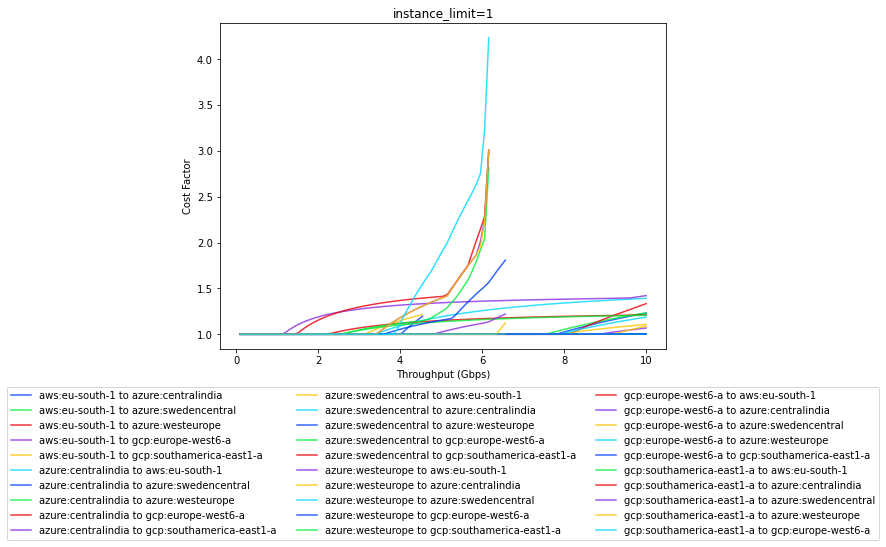

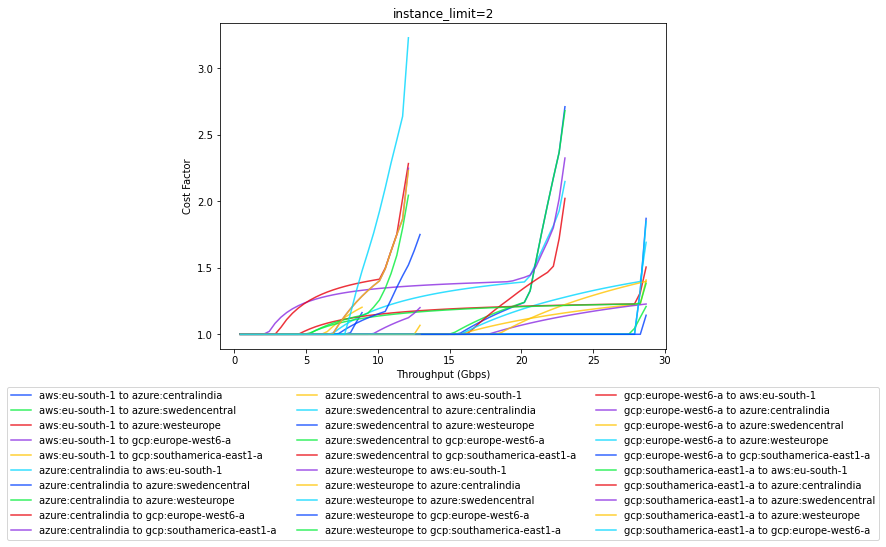

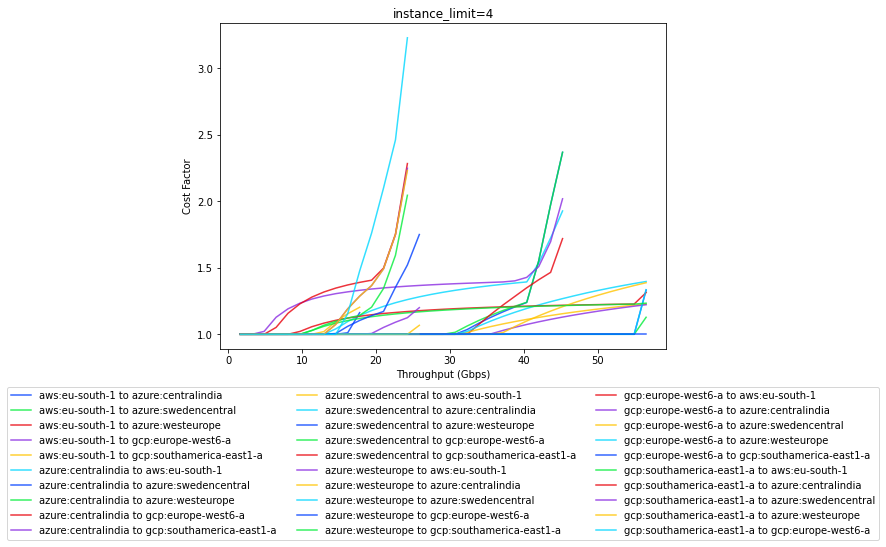

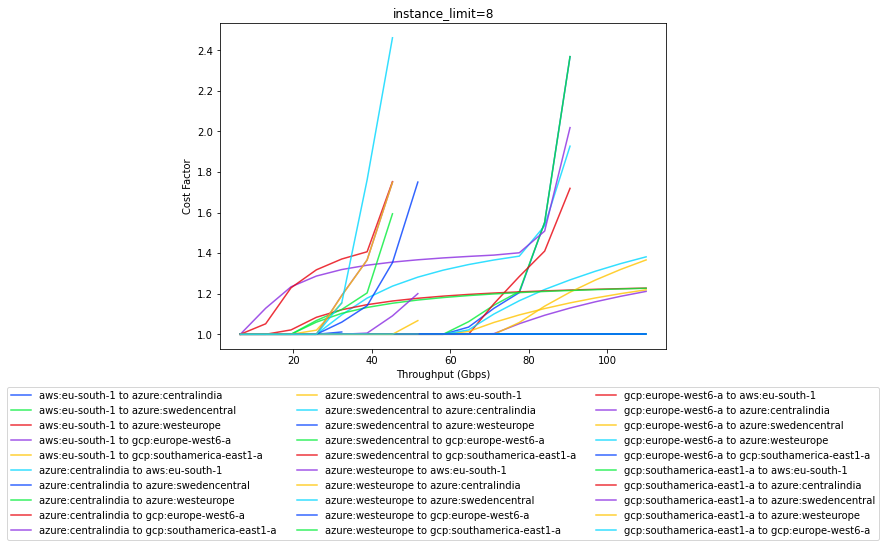

In [61]:
df = pd.read_csv("/home/ubuntu/skylark/data/pareto.csv")
# gcp:us-central1-c -> "gcp:us"
# aws:us-east-1 -> "aws:us"
df["src_region"] = df["src"].apply(lambda x: x.split("-")[0])
df["dst_region"] = df["dst"].apply(lambda x: x.split("-")[0])

df["cost_factor"] = df["cost_factor"] * df["instance_limit"]
df["throughput_speedup"] = df["throughput_speedup"] / df["instance_limit"]

# plot scatter w/ cost_factor vs throughput_speedup, color by src with legend
for instance_limit, df_limit in df.groupby("instance_limit"):
    fig, ax = plt.subplots(figsize=(8, 6))
    for (src_region, dst_region), df_grouped in df_limit.groupby(["src", "dst"]):
        df_grouped.sort_values(by="throughput", inplace=True)
        label = "{} to {}".format(src_region, dst_region)
        sns.lineplot(x="throughput", y="cost_factor", data=df_grouped, ax=ax, label=label, alpha=0.8, markers=True)
    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.6), ncol=3)
    ax.set_title("instance_limit={}".format(instance_limit))
    ax.set_xlabel("Throughput (Gbps)")
    ax.set_ylabel("Cost Factor")

    # white background (no transparency)
    fig.set_facecolor("white")

    fig.savefig(figure_dir / f"pareto_speedups_{instance_limit}.png", bbox_inches="tight", dpi=300)
    fig.savefig(figure_dir / f"pareto_speedups_{instance_limit}.pdf", bbox_inches="tight", dpi=300)

In [56]:
df.describe()

,min_throughput,gbyte_to_transfer,instance_limit,sparsity_penalty,max_connections_per_path,max_connections_per_node,cost,baseline_cost,throughput,baseline_throughput,throughput_speedup,cost_factor
count,4795.000000,4795.0,4795.000000,4795.0,4795.0,4795.0,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000
mean,5.036286,1.0,2.229406,0.0,64.0,64.0,0.065784,0.087379,12.126795,6.956269,1.087056,1.090060
std,3.424335,0.0,1.890166,0.0,0.0,0.0,0.044346,0.029954,15.822514,4.095704,1.312327,0.208951
min,0.101010,1.0,1.000000,0.0,64.0,64.0,0.002500,0.020000,0.101010,1.152816,0.007092,1.000000
25%,2.222222,1.0,1.000000,0.0,64.0,64.0,0.026056,0.080000,3.232323,3.415887,0.361985,1.000000
50%,4.444444,1.0,2.000000,0.0,64.0,64.0,0.059001,0.087500,6.464646,6.639285,0.708436,1.000000
75%,7.272727,1.0,2.000000,0.0,64.0,64.0,0.090000,0.120000,14.545455,8.841826,1.194605,1.116045
max,14.343434,1.0,8.000000,0.0,64.0,64.0,0.360853,0.120000,109.898990,14.242665,9.988716,4.234896
